## Beyond Stoner-Wohlfarth Single-grain easy axis model
This notebook showcases how to train a ML surrogate model for micromagnetic simulations, where the external magnetic field H and the anisotropy axis K1 are aligned in z-direction.

In [1]:
import sys
from pathlib import Path
import os

# Get project root (parent of notebooks/)
PROJECT_ROOT = Path.cwd().parent.resolve()

# Add project root to Python path so src/ is importable
sys.path.insert(0, str(PROJECT_ROOT))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

In [2]:
from scripts.analyze_magnetic_data import analyze_magnetic_data

## Training data generation

The training data has been created using micromagnetic simulations with the [Mammos-Mumag package](https://github.com/MaMMoS-project/mammos-mumag). An isolated cubic grain with edge length 50nm has been simulated with aligned external magnetic field (H) and anisotropy axis (K1). One hysteresis loop was computed for each combination of material parameters A, Ms, K. From the hysteresis loops, Hc, Mr and BHmax are computed. The input ranges of the intrinsic properties were set to:

· 7.9×10^4 < Ms[A/m] < 3.9×10⁶ 

· 10⁻¹³ < A [J/m] < 10^-11

· 10⁴ < K1 [J/m³] < 10^7

This is the input data for the ML model, available at data/magnetic_materials.csv. In total 1497 data points were computed.

## Data Pre-Processing

Prior to fitting machine learning models, the dataset is analyzed. In this specific case where the anisotropy axis is aligned with the external magnetic field, the dataset can be split into two distinct clusters when considering the dimensionless ratio Mr/Ms. The cluster for hard magnets corresponds to Mr/Ms≈1 while other points lie around Mr/Ms≈0.

In [ ]:
# writes stdoud of executed functions to .txt file stored in logs/
os.makedirs('../logs/', exist_ok=True)

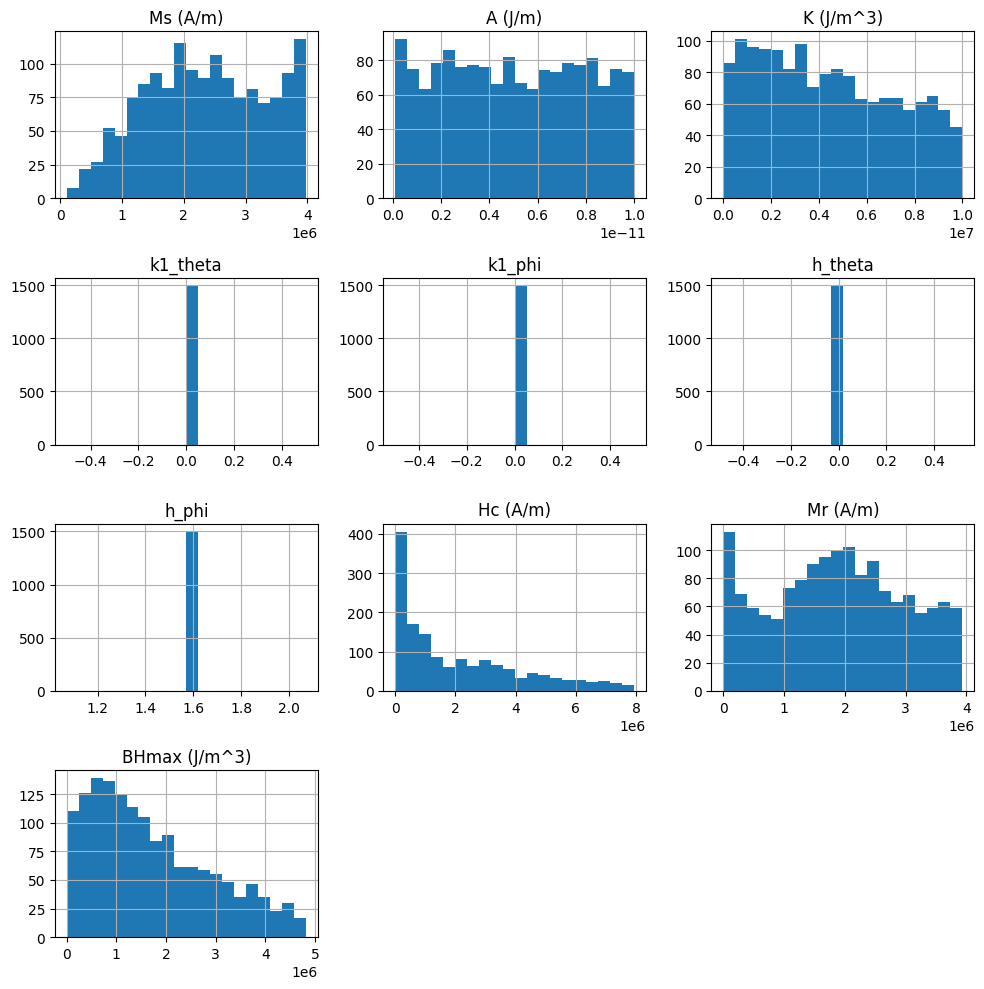

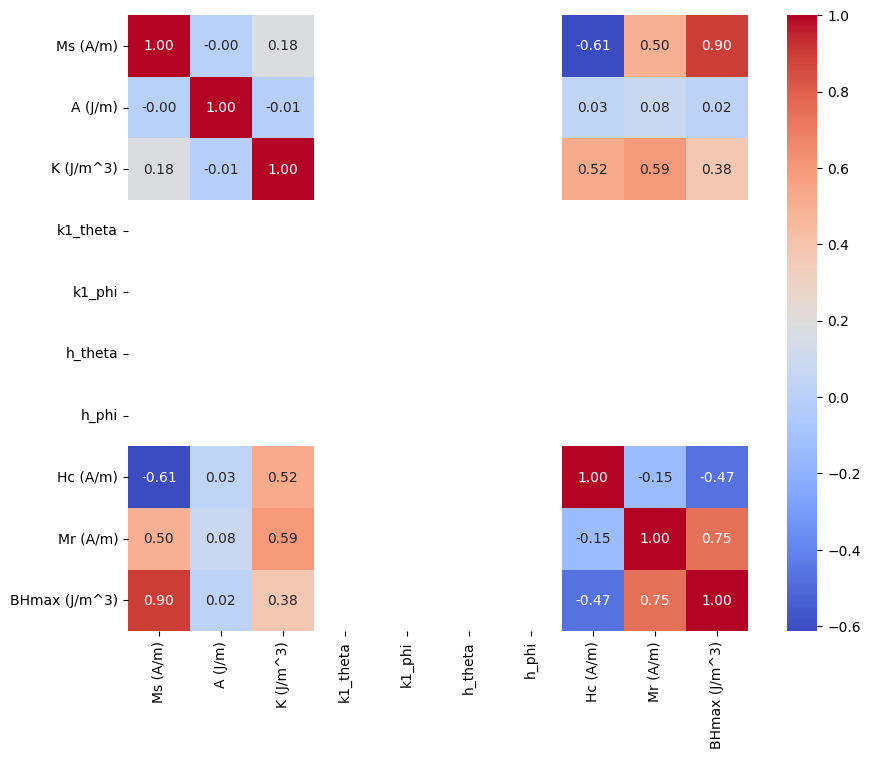

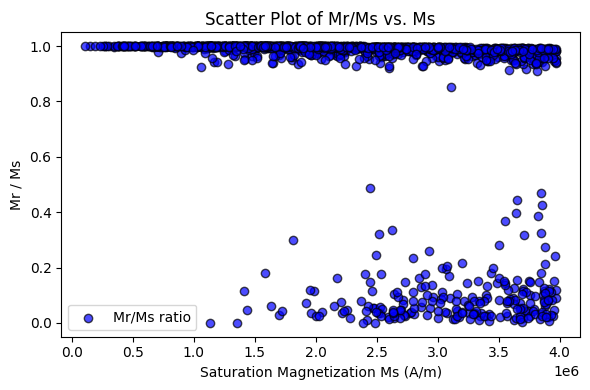

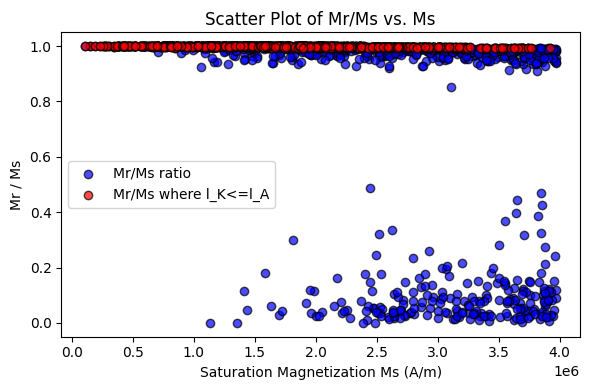

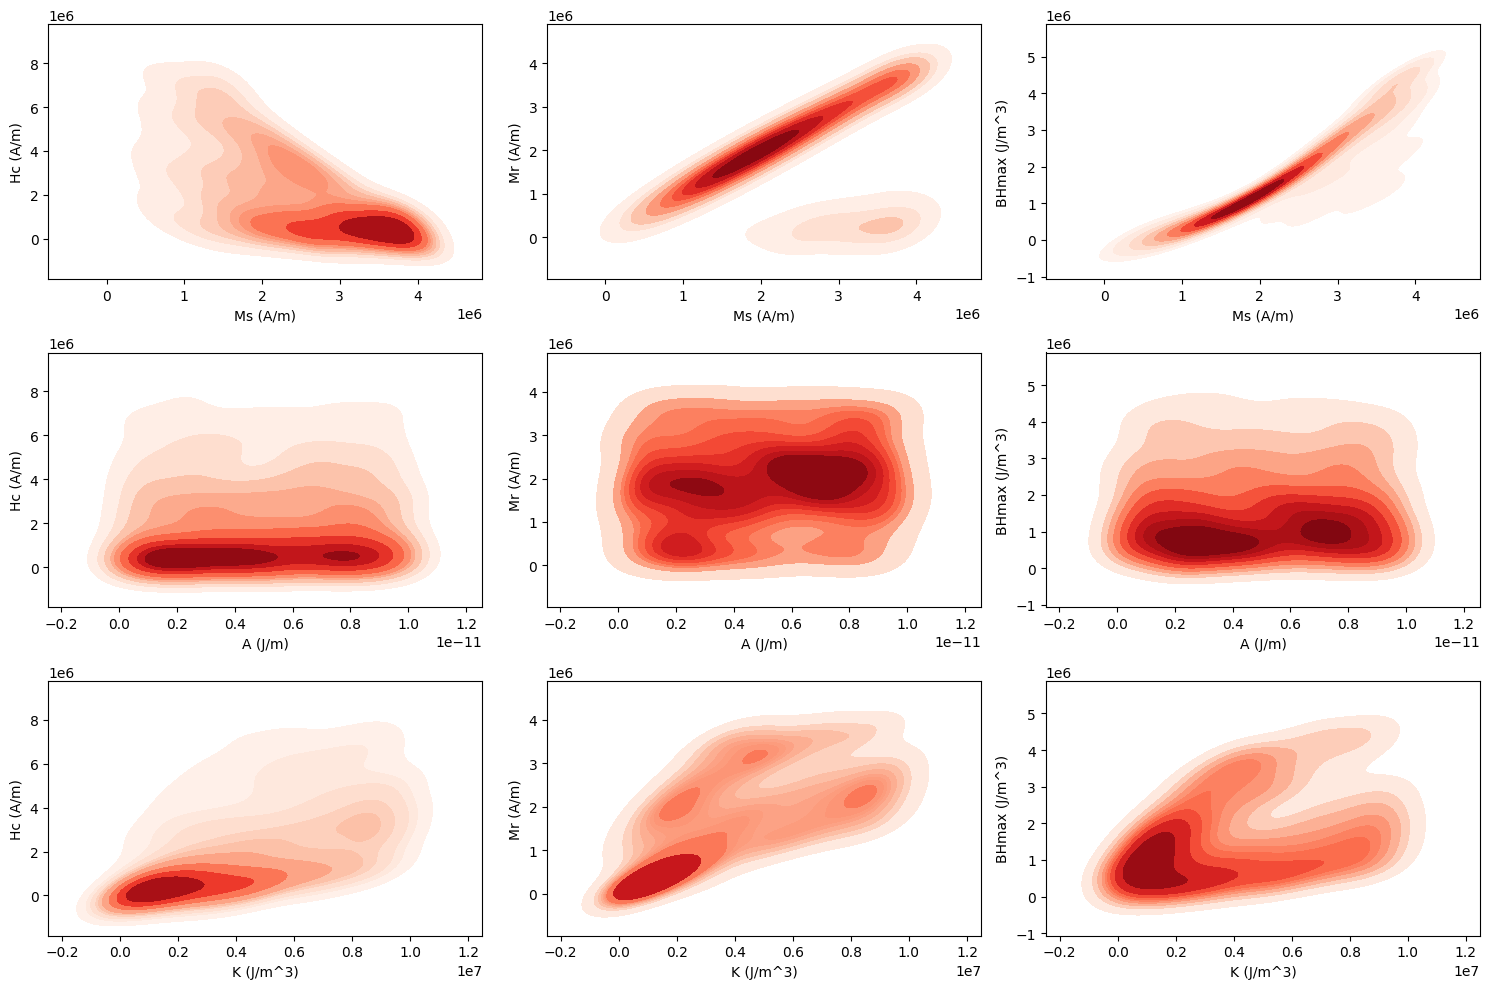

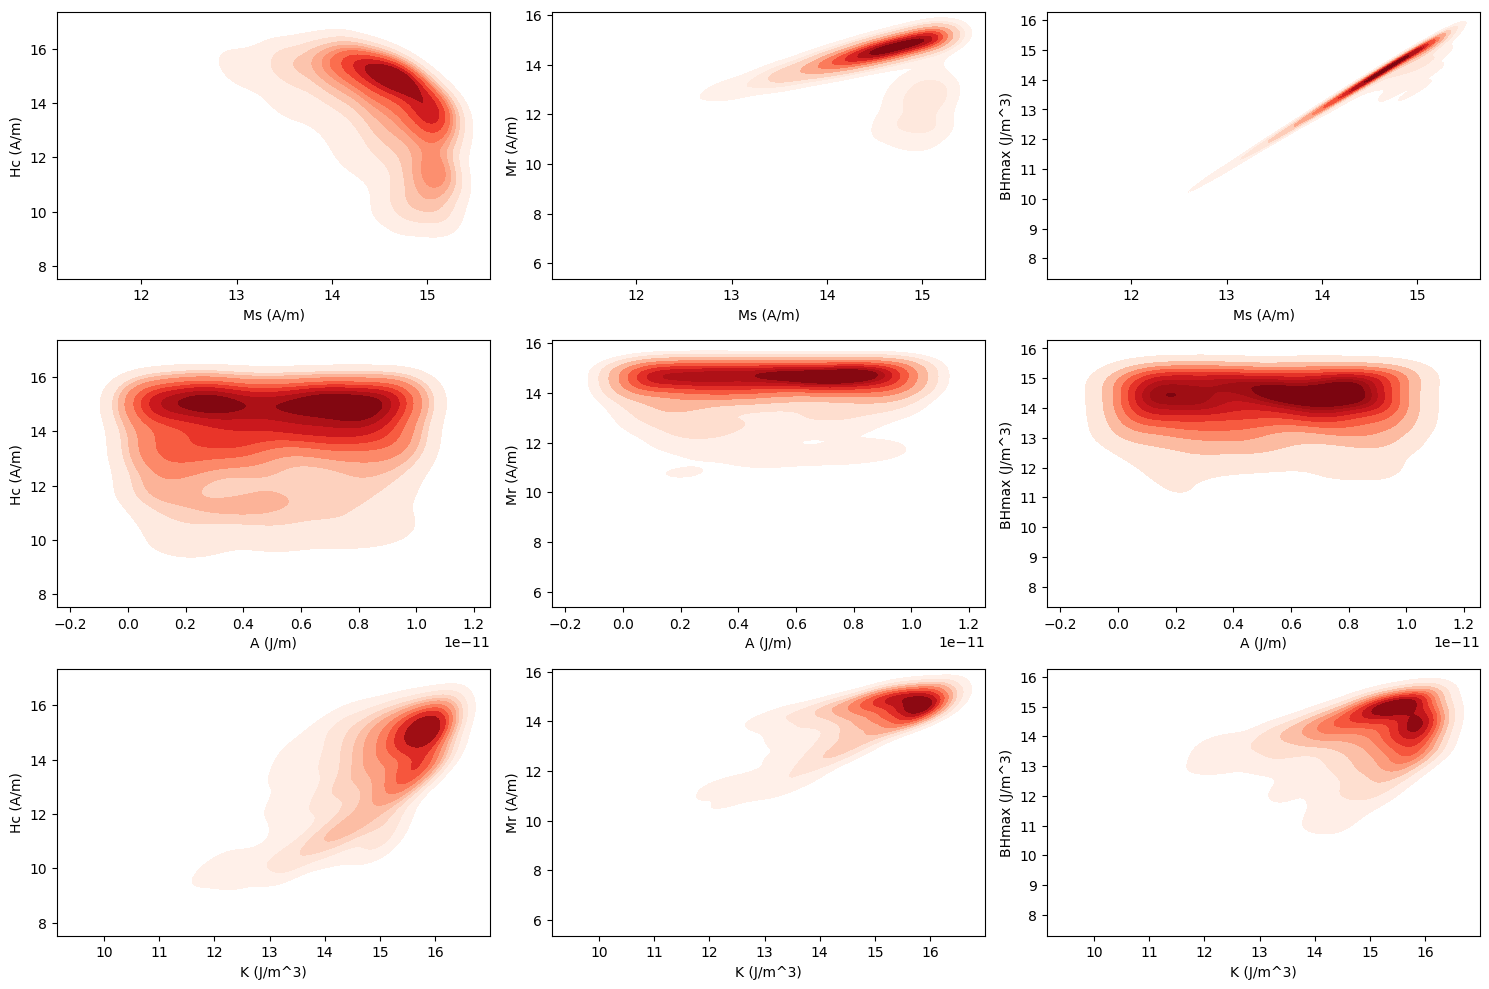

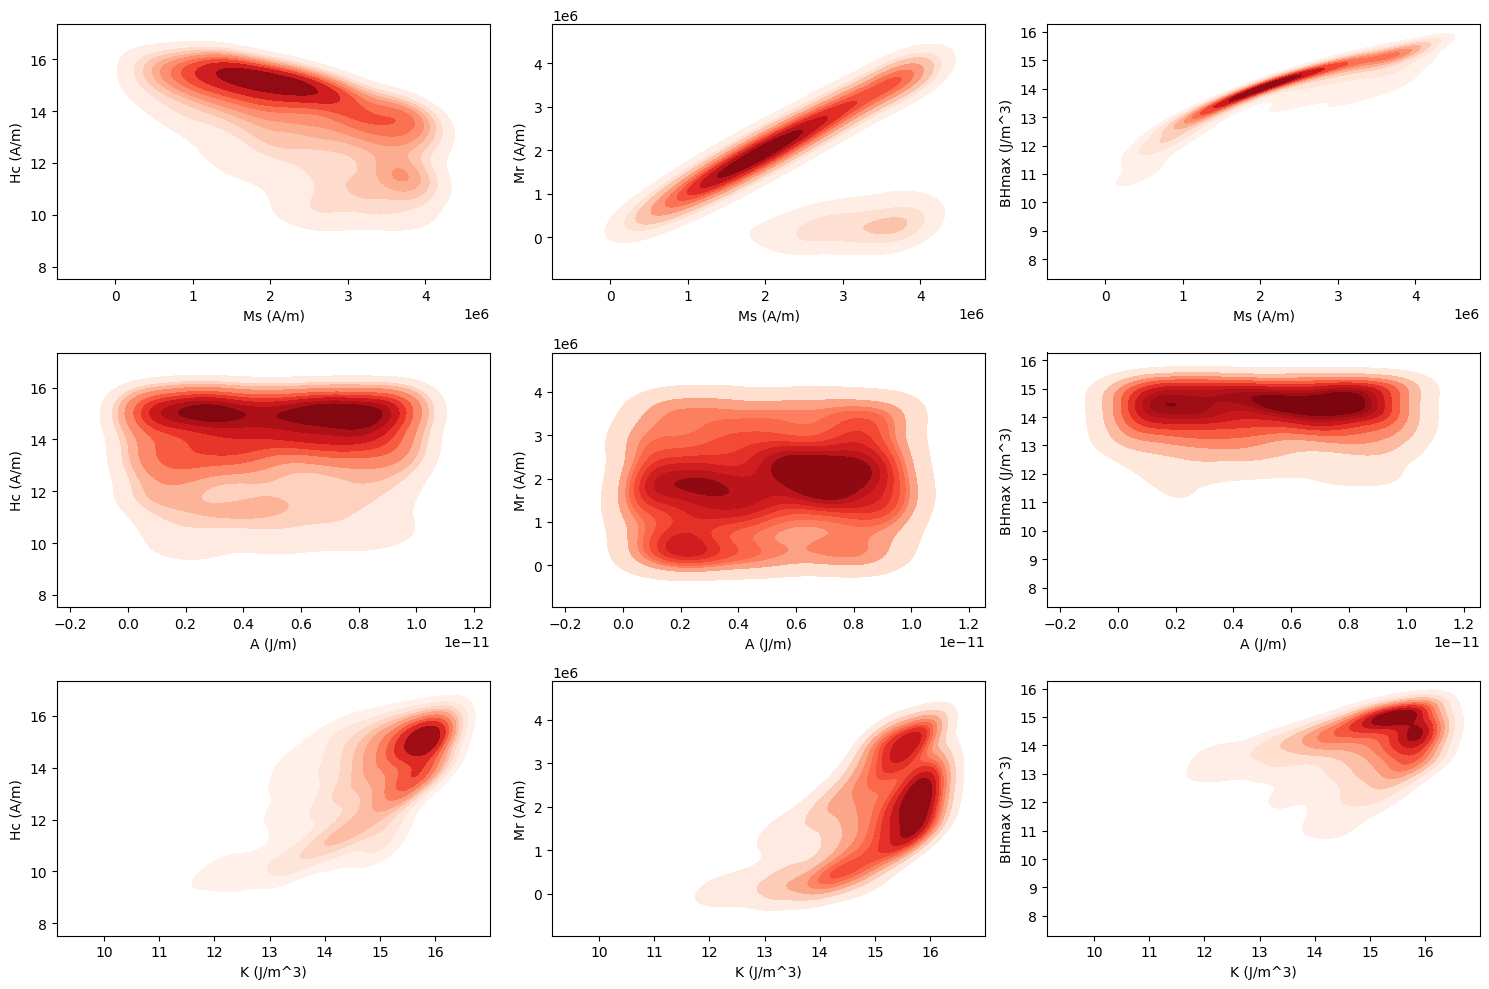

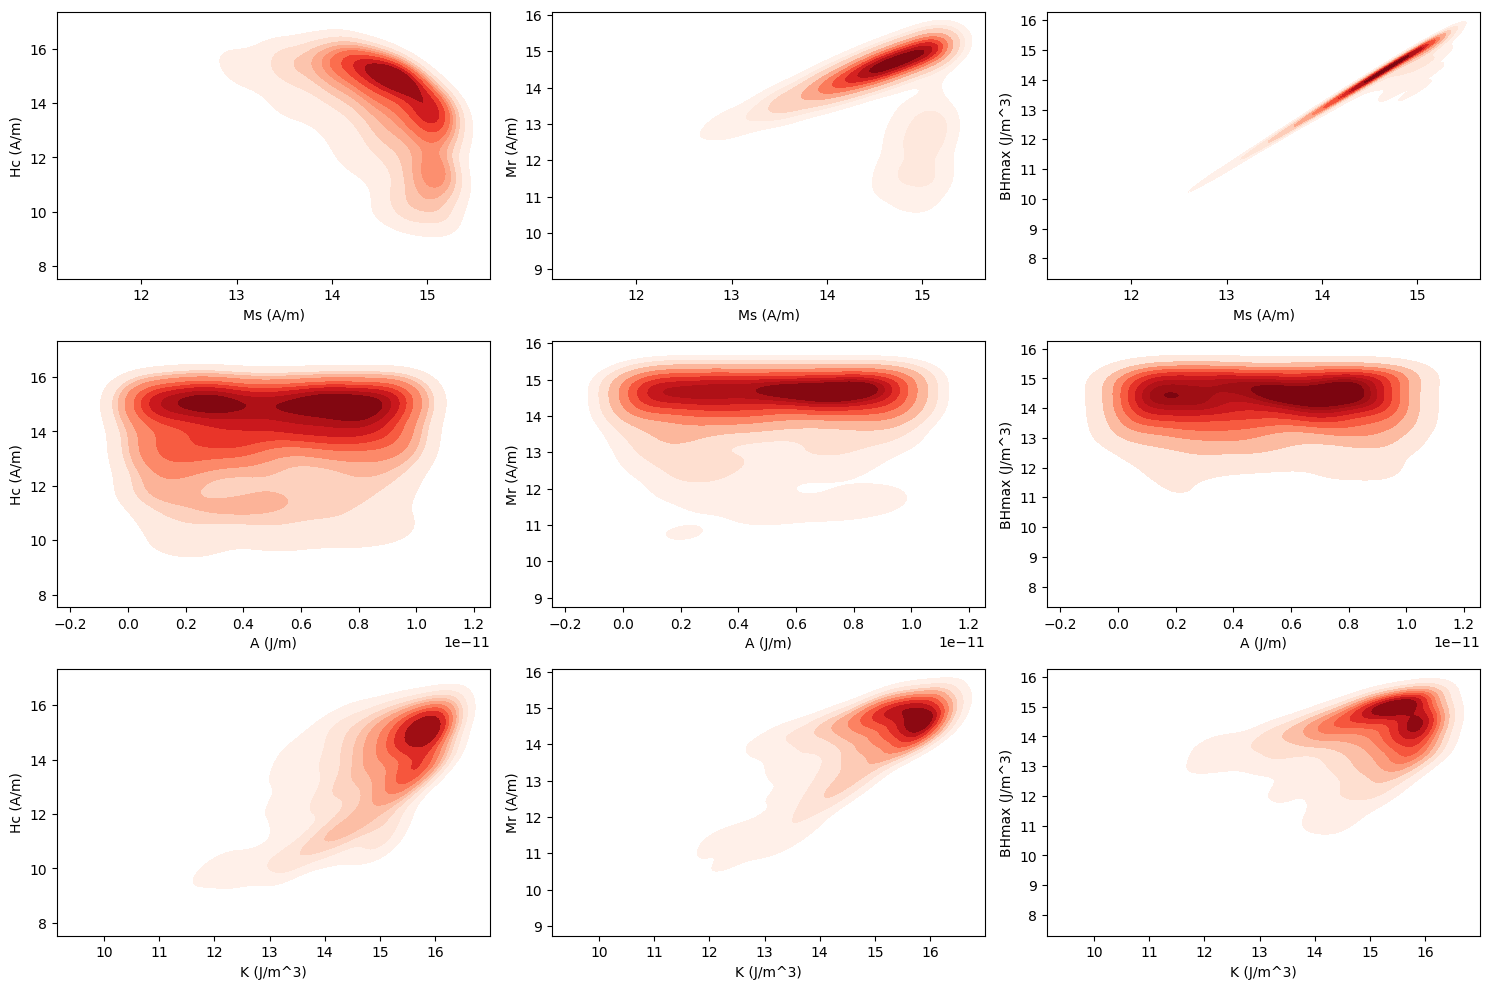

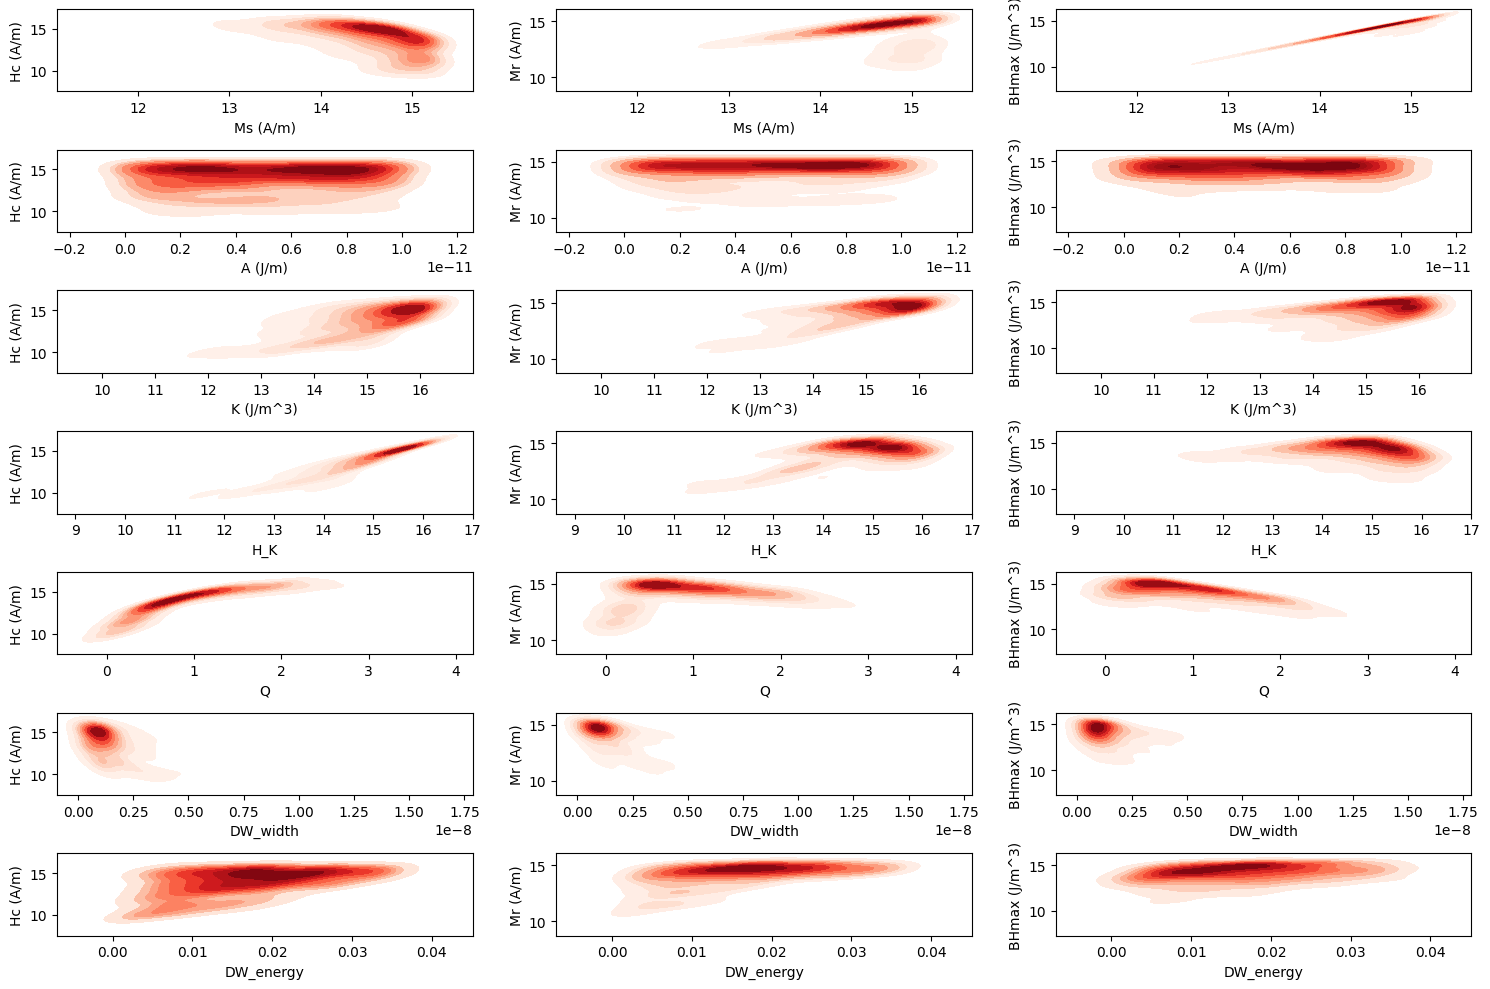

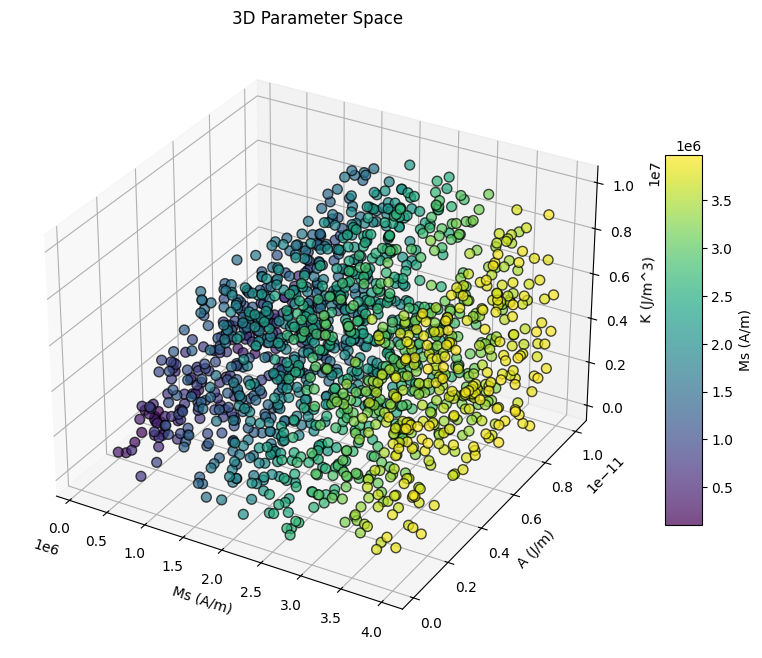

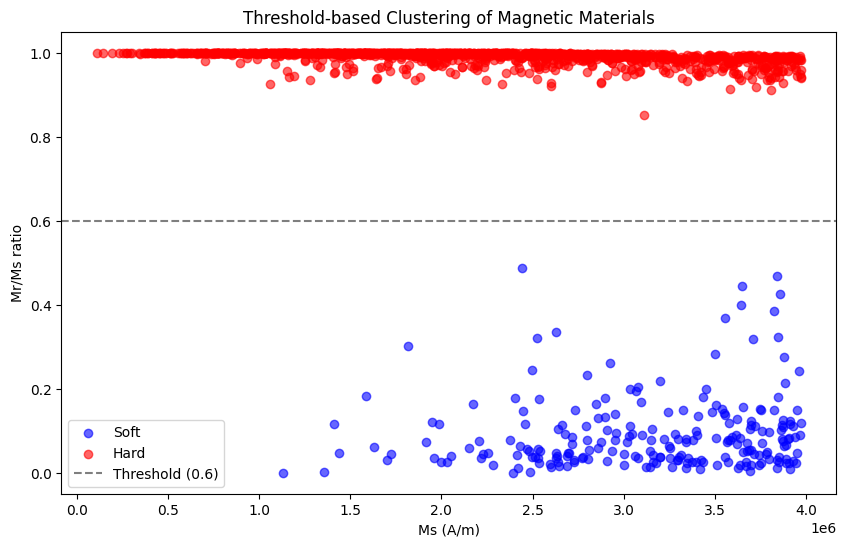

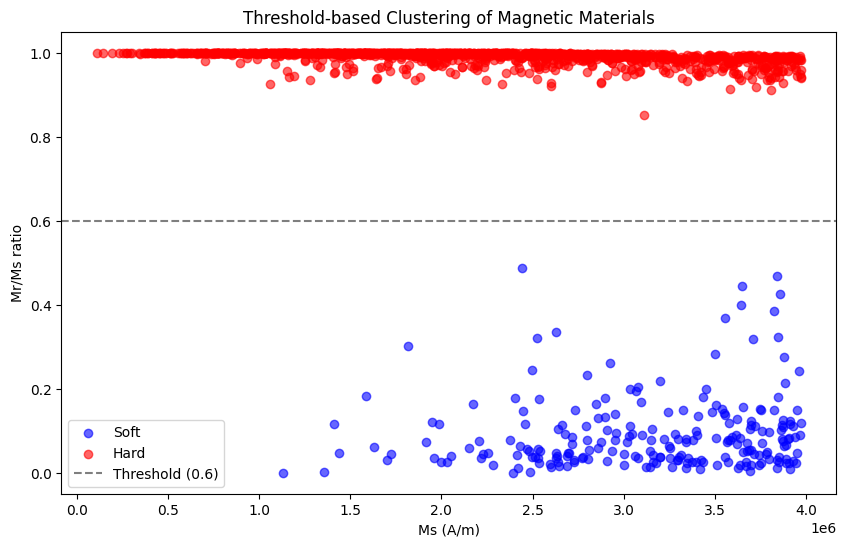

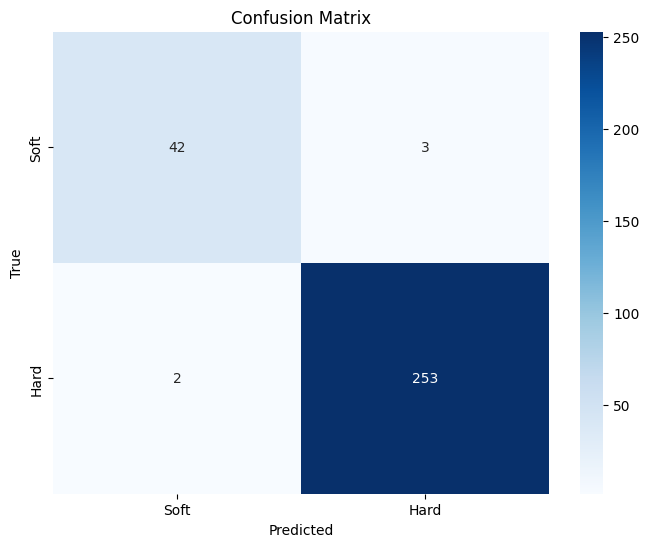

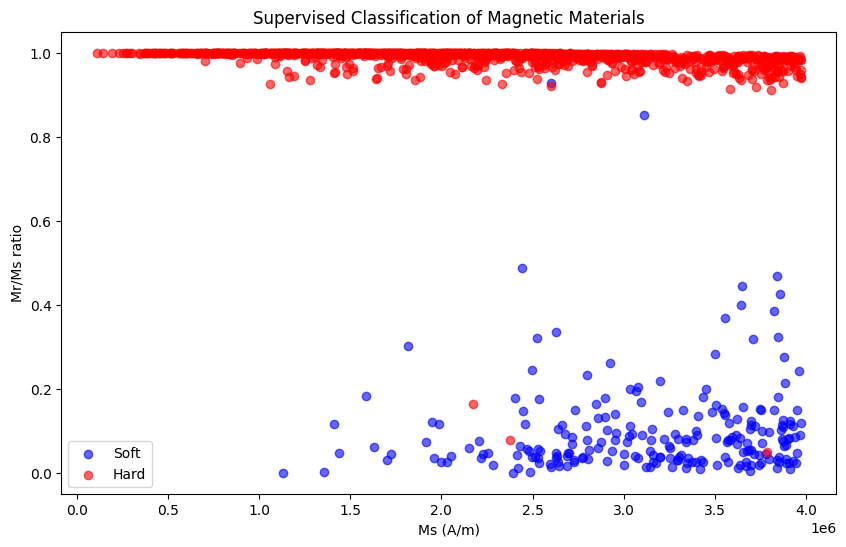

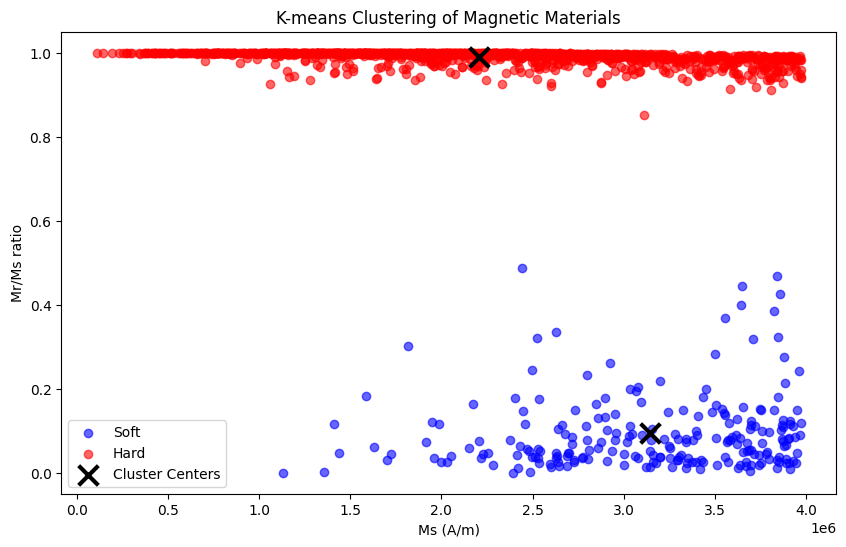

In [4]:
analyze_magnetic_data(data_path='data/magnetic_materials.csv')

### Model training
The below code snippet trains a linear regression (LR) models, a random forest (RF), the LASSO regression, a Gaussian process and a fully connected neural network (FCNN).

In [5]:
from scripts.train_model import MLPipeline
import argparse

In [6]:
configpath = 'config/ml_config_test.yaml'

In [7]:
pipeline = MLPipeline(configpath)

In [8]:
pipeline.run()

### Plot Metrics

In [9]:
from scripts.plot_metrics import *

In [10]:
results_dir = 'results/'

In [11]:
output = 'results/metric_tables'

In [12]:
# Set matplotlib style
plt.style.use('ggplot')

In [13]:
# Set default output directory as a subdirectory of the input directory
results_path = Path(results_dir)
if output is None:
    output_path = results_path / "metric_tables"
else:
    output_path = Path(output)

In [14]:
# Create output directory
output_path.mkdir(parents=True, exist_ok=True)

In [15]:
# Load results
results = load_results(results_dir)

In [16]:
# Create tables
create_metric_tables(results, output_path)
        
print(f"Tables and plots generated successfully in {output_path}")

Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Hc__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_all_standard_BHmax__J_m_3__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_all_standard_Mr__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Hc__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_BHmax__J_m_3__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster1_standard_Mr__A_m__metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Overall_metrics.png
Saved metrics plot to results/metric_tables/LogTransformation_cluster0_standard_Hc__A_m__metrics.png
Sav